### Linear Regression
** Modeling a Linear Relationship in Tensorflow **  
In this notebook we model the relationship between ground temperature and the chirping of crickets. The dataset is derived from a book "Songs of the Insects" written in 1948 by  G. W. Pierce.

In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Download data
!wget -nv -O data/PierceCricketData.csv 'https://ibm.box.com/shared/static/reyjo1hk43m2x79nreywwfwcdd5yi8zu.csv'

** View Data ** 

In [2]:
datafile = pd.read_csv("data/PierceCricketData.csv")
datafile.head()

,Chirps,Temp
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


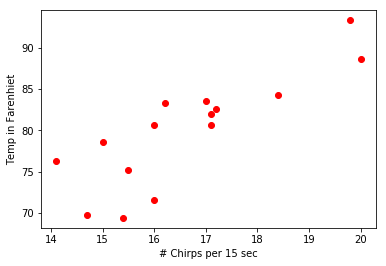

In [4]:
%matplotlib inline

x_data, y_data = (datafile["Chirps"].values,datafile["Temp"].values)

# plots the data points
plt.plot(x_data, y_data, 'ro')
# label the axis
plt.xlabel("# Chirps per 15 sec")
plt.ylabel("Temp in Farenhiet")


We can see a linear relationship in the data, and it is suitable to be fit to a linear equation of the form *Y = mX + b*  

** Creating a Tensorflow Graph **  
To implement linear regression, we first take an approximation for our m & b values, which we then will update. 

In [ ]:
X = tf.placeholder(float32,size=(x_data.size))
Y = tf.placeholder(float32,size=(y_data.size))
m = tf.Variable(0.5)
b = tf.Variable(70)

prediction = tf.add(tf.multiply(X,m),b)
                

To quantitatively evaluate our performance, we define a loss function where O(X) is our prediction (output) and Y is the data value we are trying to fit.  

$$ loss = \frac{1}{n}\sum_{i=1}^n{[O_i - Y_i]^2} $$